In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

In [2]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[i + 1] - 1) for i in range(n - 1)])
def effective_hem(size, J):
    hem = np.zeros((2**size, 2**size))
    for i in range(2**size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1)**int(i) for i in binary]
        hem[i,i] = h(size, J, Z)
    return hem
#print(effective_hem(4,[1,1,1]))

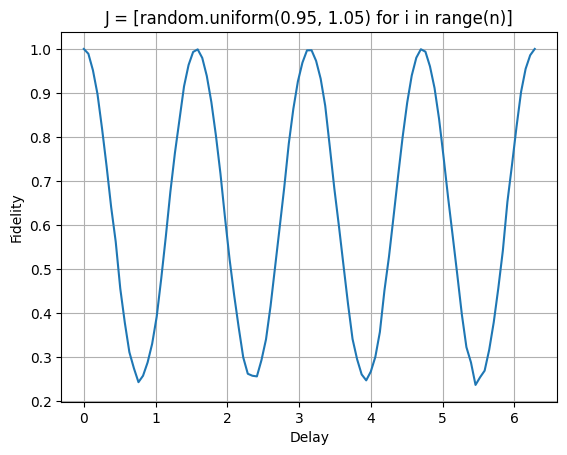

In [26]:
from scipy.linalg import expm
import random
res = []
delay = np.linspace(0,2*np.pi,100)

fid = []
n = 2
J = [random.uniform(1, 1) for _ in range(n)]
for t in delay:
    #qr = QuantumRegister(n)
    #cr = ClassicalRegister(n)
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)

    U = expm((-1j*t)*effective_hem(n,J))
    U = qi.Operator(U)

    qc.unitary(U, [i for i in range(n)])

    for i in range(n):
        qc.h(i)
    qc.measure_all()
    #qc.measure(qr[1],cr[1])

    #Simulator
    qcomp = Aer.get_backend("qasm_simulator")
    result = qiskit.execute(qc, Aer.get_backend('qasm_simulator'), shots=8000).result()
    fid.append(result.get_counts().get('0'*n,0)/8000)
    res.append(result.get_counts())




plt.grid()
plt.ylabel('Fidelity')
plt.xlabel('Delay')
plt.title('J = [random.uniform(0.95, 1.05) for i in range(n)]')
plt.plot(delay,fid)

8000
7912
7875
7839
7854
7612
7479
7614
7494
7179
7448
7147
6896
6552
6087
5595
6086
5866
6598
5883
5196
-944
4180
3184
4120
1170
5665
4494
3330
-1503
2140
3558
2122
1665
4686
3030
1372
2485
4343
2523
686
-1901
64
2255
312
1939
-123
-2102
-82
-1916
-3963
-1982
74
-1941
-41
2256
394
1887
157
2793
1046
3130
1528
3197
1598
-1511
-214
3612
2246
-1169
3416
2291
3412
5400
6300
5444
4600
6107
5495
4828
5442
6713
7144
6729
6288
7319
7516
7269
7032
7708
7623
7712
7594
7945
7928
7947
7928
7992
7987
7984
7837
7780
7728
7782
7508
7670
7509
7340
7033
7360
7050
6720
517
6943
6420
5886
5731
4948
4196
4930
4929
3907
2878
3898
4176
2887
4164
2906
1476
5001
3527
2002
-1659
-3376
-1689
1248
-1831
88
-1772
618
-1957
-3939
-1847
122
1974
4030
2053
60
-1988
56
-1980
-48
-1915
40
-1751
588
-1765
-3547
-829
906
1599
4923
3398
1846
4039
2748
4040
2662
-1094
3661
4755
3698
5478
4612
3779
4602
6276
5726
6349
5798
6909
6540
6910
6558
7409
7214
7405
7200
7751
7835
7749
7670
7974
7968
7958
7968
7976
7969
7975
7964


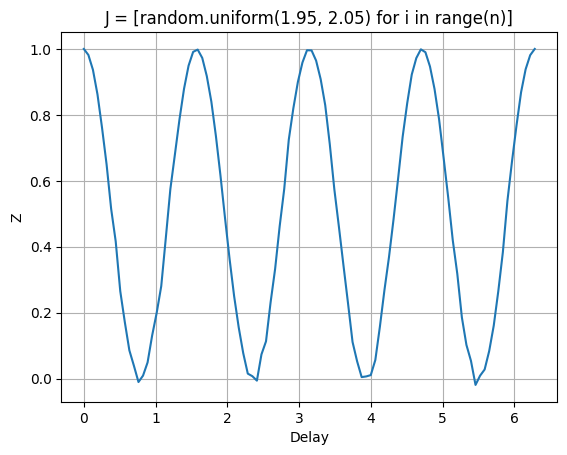

In [34]:
Z = []
for r in res:
    z = 0
    for bit in r.keys():
        number = [(-1)**int(i) for i in bit]
        mult = np.prod(number)
        z += mult * r.get(bit,0)
        print(z)
    Z.append(z/8000)

plt.grid()
plt.ylabel('Z')
plt.xlabel('Delay')
plt.title('J = [random.uniform(1.95, 2.05) for i in range(n)]')
plt.plot(delay,Z)

In [24]:
print(res)

[{'00': 8000}, {'00': 7896, '11': 28, '01': 36, '10': 40}, {'00': 7633, '10': 129, '01': 117, '11': 121}, {'00': 7189, '11': 281, '01': 262, '10': 268}, {'00': 6597, '10': 504, '11': 442, '01': 457}, {'00': 5930, '10': 720, '11': 689, '01': 661}, {'01': 974, '00': 5133, '11': 958, '10': 935}, {'00': 4385, '01': 1167, '11': 1223, '10': 1225}, {'10': 1439, '01': 1507, '00': 3620, '11': 1434}, {'11': 1622, '01': 1653, '00': 3120, '10': 1605}, {'11': 1774, '01': 1841, '00': 2573, '10': 1812}, {'11': 1942, '01': 2007, '00': 2146, '10': 1905}, {'00': 1966, '11': 2004, '10': 2041, '01': 1989}, {'00': 1962, '11': 2023, '10': 2053, '01': 1962}, {'00': 2283, '10': 1938, '11': 1941, '01': 1838}, {'11': 1710, '01': 1836, '10': 1777, '00': 2677}, {'10': 1536, '00': 3255, '01': 1574, '11': 1635}, {'01': 1393, '00': 3844, '10': 1380, '11': 1383}, {'11': 1105, '00': 4625, '01': 1100, '10': 1170}, {'00': 5377, '11': 881, '10': 885, '01': 857}, {'00': 6023, '10': 647, '01': 657, '11': 673}, {'00': 6810,